In [3]:
import numpy as np
import pandas as pd
import os
import scipy

from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style='whitegrid')

import itertools as it

%config InteractiveShell.ast_node_interactivity='all'
%config InlineBackend.figure_format = 'svg'

In [4]:
pd.set_option('max_rows', 96)

# Data


In [5]:
tecan_main = '../data/abs-flu/exp1/tecan_results/abs-fluo_exp1_main.csv'
df_main = pd.read_csv(tecan_main, index_col=0)
df_tmp = df_main.copy()
df_tmp.head()
df_main.head()

,row,col,B_lbl,C_lbl,F680,A680,A750
well,,,,,,,
A1,A,1,0.200,0.25,4669.0,0.8037,0.5047
B1,B,1,0.175,0.25,4835.0,0.8649,0.5056
C1,C,1,0.150,0.25,4641.0,0.7752,0.4730
D1,D,1,0.125,0.25,4778.0,0.7808,0.4494
E1,E,1,0.100,0.25,4939.0,0.7615,0.4315


,row,col,B_lbl,C_lbl,F680,A680,A750
well,,,,,,,
A1,A,1,0.200,0.25,4669.0,0.8037,0.5047
B1,B,1,0.175,0.25,4835.0,0.8649,0.5056
C1,C,1,0.150,0.25,4641.0,0.7752,0.4730
D1,D,1,0.125,0.25,4778.0,0.7808,0.4494
E1,E,1,0.100,0.25,4939.0,0.7615,0.4315


In [6]:
df_main

,row,col,B_lbl,C_lbl,F680,A680,A750
well,,,,,,,
A1,A,1,0.200,0.250,4669.0,0.8037,0.5047
B1,B,1,0.175,0.250,4835.0,0.8649,0.5056
C1,C,1,0.150,0.250,4641.0,0.7752,0.4730
D1,D,1,0.125,0.250,4778.0,0.7808,0.4494
E1,E,1,0.100,0.250,4939.0,0.7615,0.4315
F1,F,1,0.050,0.250,5389.0,0.7242,0.3928
G1,G,1,0.025,0.250,6295.0,0.7175,0.3795
H1,H,1,0.000,0.250,6657.0,0.7161,0.3673
A2,A,2,0.200,0.225,4216.0,0.7442,0.4826


# Pre-Processing

'C_lbl'

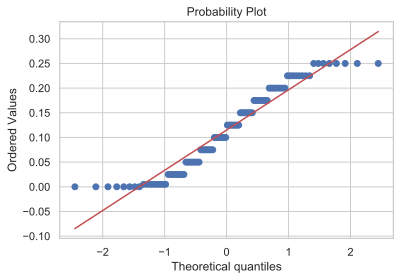

In [7]:
# ensure that variables follow a normal distribution
for col in df_main.columns[3:]:
    col
    fig = scipy.stats.probplot(df_main[col], dist='norm', plot=plt)
    plt.show()
    break


In [10]:
# checking for Multicolinearity
# we already know that our measurements (Abs and Fluo) are highly dependant
# on the concentration of Chlamy, and therefore we will drop this column
# during the multiple-linear regression fitting and let the other variables
# camputure the variability of [B]

#check=['corr_abs_600','corr_abs_680', 'corr_abs_750', 'corr_fluo', 'ln(corr_fluo)']
#df_main[check].corr().style.background_gradient(cmap='coolwarm')

# ML Parameter Learning

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [12]:
# ALL IN and then remove predictor-wise
# SL = 0.05 ... consider the predictor
# with highest P-value, and then remove if P > SL

# check as many possible models and then choose Akaike best 

# Fit Multiple Linear Regression to [C]

In [13]:
# with A680 & A750
X = df_main[['corr_abs_680', 'corr_abs_750']].values # R-sq = .936
#X = df_main[['corr_abs_750', 'corr_abs_680']].values # R-sq = .936

#X = df_main[['corr_abs_680', 'logn(corr_fluo)']].values # R-sq = .859
#X = df_main[['corr_abs_750', 'logn(corr_fluo)']].values # R-sq = .677
#X = df_main[['corr_abs_750', 'corr_fluo']].values
#X = df_main[['corr_abs_680', 'corr_abs_750', 'corr_fluo']].values
#X = df_main[['ratio_abs', 'log(corr_fluo)']].values # R-sq = .437


# with new A600
#X = df_main[['corr_abs_600', 'corr_abs_750', 'ln(corr_fluo)']] # w/ 'chlamy_cnt' R-sq = .78
#X = df_main[['corr_abs_600', 'corr_abs_750', 'ln(corr_fluo)']] # w/ ln(chlamy_cnt) R-sq = .53
#X = df_main[['corr_abs_600', 'ln(corr_fluo)']] # w/ 'chlamy_cnt' R-sq = .72

#X = df_main[['corr_abs_600', 'ln(corr_fluo)']] # w/ 'ln(chlamy_cnt)' R-sq = .93

#X = df_main[['corr_abs_750', 'ln(corr_fluo)']] # w/ 'ln(chlamy_cnt)' R-sq = .92
#X = df_main[['corr_abs_600', 'corr_abs_750']] # w/ 'ln(chlamy_cnt)' R-sq = .78


# 3 Absorbances
#X = df_main[['corr_abs_600', 'corr_abs_680', 'corr_abs_750']].values



yc = df_main[['chlamy_cnt']].values
#yc = df_main[['ln(chlamy_cnt)']].values


Xtrn, Xtst, ytrn, ytst = train_test_split(X, yc, test_size=0.15, random_state=77)

regressor = LinearRegression().fit(Xtrn,ytrn)
print('Coefficients: ', regressor.coef_[0])

KeyError: "None of [Index(['corr_abs_680', 'corr_abs_750'], dtype='object')] are in the [columns]"

In [14]:
# statistics on the regression above

# note that the models are only slightly different
# this is due to the the statsmodel library requiring
# an extra dimension of ONEs as constants see below...
X = np.append(arr=np.ones((96,1)).astype(int), values=X, axis=1)
Xopt = X[:,[0,1,2]]

regressor_OLS = sm.OLS(endog=yc, exog=Xopt).fit()
regressor_OLS.summary()

NameError: name 'X' is not defined

In [15]:
regressor_OLS.params

NameError: name 'regressor_OLS' is not defined

In [ ]:
### df_tmp['C_mlr'] = regressor.predict(df_main[['corr_abs_680', 'corr_abs_750', 'log(corr_fluo)']])
#df_tmp['C_mlr'] = regressor.predict(df_main[['corr_abs_680', 'log(corr_fluo)']])
#df_tmp['C_mlr'] = regressor.predict(df_main[['corr_abs_750', 'logn(corr_fluo)']])
#df_tmp['C_mlr'] = regressor.predict(df_main[['corr_abs_680', 'corr_abs_750']])

# with new A600
df_tmp['C_mlr'] = regressor.predict(df_main[['corr_abs_600', 'ln(corr_fluo)']])
#df_tmp['C_mlr'] = np.power(np.e, df_tmp['C_mlr'])


# Fit Multiple Linear Regression to [B]

In [12]:
# w/ 'bact_cnt'
#X = df_main[['corr_abs_600', 'corr_abs_750']] # R-sq = .68
#X = df_main[['corr_abs_600', 'corr_abs_750', 'ln(corr_fluo)']] # R-sq = .68
#X = df_main[['corr_abs_600', 'ln(corr_fluo)']] # R-sq = .46
#X = df_main[['corr_abs_750', 'ln(corr_fluo)']] # R-sq = .54

    # A680 & A750   .... best model, but unfortunately A680 data non-existent
X = df_main[['corr_abs_680', 'corr_abs_750']] # R-sq = .97 


# w/ 'ln(bact_cnt)
#X = df_main[['corr_abs_600', 'corr_abs_750', 'ln(corr_fluo)']] # R-sq = .38
#X = df_main[['corr_abs_750', 'ln(corr_fluo)']] # R-sq = .38
#X = df_main[['corr_abs_600', 'corr_abs_750']] # R-sq = .59

#3 Absorbances
#X = df_main[['corr_abs_600', 'corr_abs_680', 'corr_abs_750']].values # R-sq = .92


#yb= df_main[['ln(bact_cnt)']].values
yb= df_main[['bact_cnt']].values


Xtrn, Xtst, ytrn, ytst = train_test_split(X, yb, test_size=0.15, random_state=77)
regressor = LinearRegression().fit(Xtrn, ytrn)
print('Coefficients: ', regressor.coef_[0])

Coefficients:  [-0.70117065  1.66495908]


In [13]:
# statistics on the regression above

# note that the models are only slightly different
# this is due to the the statsmodel library requiring
# an extra dimension of ONEs as constants see below...

X = np.append(arr=np.ones((96,1)).astype(int), values=X, axis=1)
#Xopt = X[:,[0,1,2,3]]
Xopt = X[:,[0,1,2]]

regressor_OLS = sm.OLS(endog=yb, exog=Xopt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2068.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           8.15e-78
Time:                        12:08:11   Log-Likelihood:                 305.34
No. Observations:                  96   AIC:                            -604.7
Df Residuals:                      93   BIC:                            -597.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.002      2.475      0.015       0.001       0.011
x1            -0.6993      0.014    -49.517      0.000      -0.727      -0.671
x2             1.6592      0.027     60.881      0.000       1.605       1.713
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.216
Skew:                          -0.086   Prob(JB):                        0.898
Kurtosis:                       3.157   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#df_tmp['B_mlr'] = regressor.predict(df_main[['corr_abs_680', 'corr_abs_750', 'log(corr_fluo)']])
#df_tmp['B_mlr'] = regressor.predict(df_main[['corr_abs_750', 'corr_abs_680']])
#df_tmp['B_mlr'] = regressor.predict(df_main[['corr_abs_750', 'logn(corr_fluo)']])
#df_tmp['B_mlr'] = regressor.predict(df_main[['corr_abs_750', 'corr_fluo']])
#df_tmp['B_mlr'] = np.power(np.e, df_tmp['B_mlr'])

df_tmp['B_mlr'] = regressor.predict(df_main[['corr_abs_600', 'corr_abs_750']])



In [15]:
df_main = df_tmp.copy()
#df_tmp.head()
df_main.head()

,row,col,well,chlamy_cnt,ln(chlamy_cnt),bact_cnt,ln(bact_cnt),corr_abs_600,corr_abs_680,corr_abs_750,corr_fluo,ln(corr_fluo),B_mlr
0,A,1,A1,0.25,-1.386294,0.200,-1.609438,0.5370,0.7210,0.4146,4666.0,8.448057,0.319014
1,B,1,B1,0.25,-1.386294,0.175,-1.742969,0.5559,0.7822,0.4155,4832.0,8.483016,0.307261
2,C,1,C1,0.25,-1.386294,0.150,-1.897120,0.5014,0.6925,0.3829,4638.0,8.442039,0.291197
3,D,1,D1,0.25,-1.386294,0.125,-2.079442,0.4693,0.6981,0.3593,4775.0,8.471149,0.274411
4,E,1,E1,0.25,-1.386294,0.100,-2.302585,0.4531,0.6788,0.3414,4936.0,8.504311,0.255968


# Verification of Multiple Linear Regression Models

In [16]:
#df_main['B_mlr']

    
    The better the models are to 'Truth', the closer the values will trace along the  1:1 curve
    
# $\hat{[B]} $$_{mlr}$

Text(0.5, 1.0, 'Predicted vs. Actual [B]')

Text(0, 0.5, '$\\hat{[B]}$$_{mlr}$')

Text(0.5, 0, '$[B]_{known}$')

(-0.01, 0.25)

(-0.01, 0.25)

Text(0, 0.5, '$\\hat{[B]}$$_{mlr}$')

Text(0.5, 0, '$[B]_{known}$')

Text(0.5, 1.0, 'Predicted vs. Actual [B]')

(-0.01, 0.25)

(-0.01, 0.25)

Text(0.5, 0.95, '[Bacteria] Predictions Using Multiple Linear Regression Models')

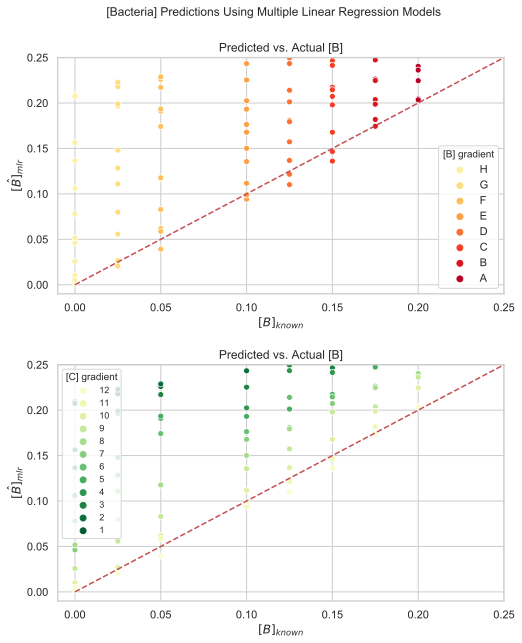

In [17]:
fig = plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(2,1)
axes = []
for r in [0,1]:
    for c in [0]:
        axes.append(fig.add_subplot(gs[r,c]))

sns.scatterplot(x='bact_cnt', y='B_mlr', data=df_main, hue='row',
                palette=sns.color_palette('YlOrRd_r', 8), ax=axes[0])

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient')
axes[0].set_title('Predicted vs. Actual [B]')
axes[0].set_ylabel('$\hat{[B]}$$_{mlr}$')
axes[0].set_xlabel('$[B]_{known}$')

axes[0].plot((0,1), 'r--',)
axes[0].set_xlim(left=-0.01, right=.25)
axes[0].set_ylim(bottom=-0.01, top=.25)



sns.scatterplot(x='bact_cnt', y='B_mlr', data=df_main, hue='col',
                palette=sns.color_palette("YlGn_r", 12), ax=axes[1])

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient',
              prop={'size':9}, loc=2)
axes[1].set_ylabel('$\hat{[B]}$$_{mlr}$')
axes[1].set_xlabel('$[B]_{known}$')

axes[1].set_title('Predicted vs. Actual [B]')
axes[1].plot((0,1), 'r--',)
axes[1].set_xlim(left=-0.01, right=.25)
axes[1].set_ylim(bottom=-0.01, top=.25)


fig.suptitle("[Bacteria] Predictions Using Multiple Linear Regression Models", y=.95)
fig.subplots_adjust(hspace=.3)
fig.savefig("Predicted [B] with MLR Model")

plt.show()
plt.close()

# $\hat{[C]}$$_{mlr}$

ValueError: Could not interpret input 'C_mlr'

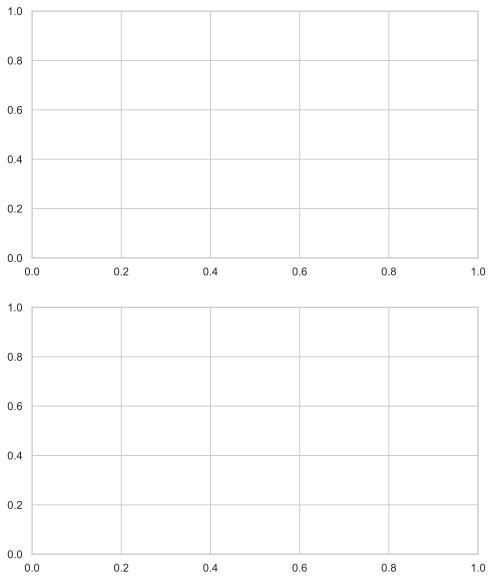

In [18]:
fig = plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(2,1)
axes = []
for r in [0,1]:
    for c in [0]:
        axes.append(fig.add_subplot(gs[r,c]))


sns.scatterplot(x='chlamy_cnt', y='C_mlr', data=df_main, hue='row',
                palette=sns.color_palette("YlOrRd_r", 8), ax=axes[0])


handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient')
axes[0].set_title('Predicted vs. Actual [C]')
axes[0].set_ylabel('$\hat{[C]}$$_{pred}$')
axes[0].set_xlabel('$[C]_{known}$')

axes[0].plot((0,1), 'r--')
axes[0].set_xlim(left=-0.01, right=.30)
axes[0].set_ylim(bottom=-0.01, top=.30)



sns.scatterplot(x='chlamy_cnt', y='C_mlr', data=df_main, hue='col',
                      palette=sns.color_palette("YlGn_r", 12), ax=axes[1])

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient',
              prop={'size':9}, loc=2)
axes[1].set_title('Predicted vs. Actual [C]')
axes[1].set_ylabel('$\hat{[C]}$$_{pred}$')
axes[1].set_xlabel('$[C]_{known}$')

axes[1].plot((0,1),'r--')
axes[1].set_xlim(left=-0.01, right=.30)
axes[1].set_ylim(bottom=-0.01, top=.30)

fig.suptitle("[Chlamy] Predictions Using Multiple Linear Regression Models", y=.95)
fig.subplots_adjust(hspace=.3)
fig.savefig("Predicted [C] with MLR Model")

plt.show()
plt.close()

# Predict $B_{[C]}$$_{mlr}7$ and $B_{[C]}$$_{mlr}6$
    
    These predictions are meant to check whether combining the [C]_pred from the MLR
    models enhances the predictions of [B] from the SLR models....
    
    
    #NOTE:
    # IT DOESN'T!

In [ ]:
fitted = '/home/rdmtinez/Documents/B-IT MS Program/Masters Thesis/data/regression/regression_fitted_parameters.csv' 
fitted = pd.read_csv(fitted, index_col=0)
fitted.head()

# k_C comes from the A680 signal when we hold B=0 or constant
# k_C * [C] the same goes for the other signals

k_C = fitted['A680_B'][0]
k_B = fitted['A680_C'][0]
kp_C = fitted['A750_B'][0]
kp_B = fitted['A750_C'][0]


We were hoping to use the Fluorescence signal to estimate the 
concentration of Chlamy and then hoped to use that value to 
regress back to the concentration of bacteria. However, a good
model to regress back to $[C]_{kwn}$ from the flurescence signal is
not trivial and difficult. Therefore I used a multiple linear
regression to arrive at $[C]_{prd}$ and then use the simple linear 
regression models to arrive at $[B]_{prd}$ $[B]_{prd} = \frac{A_{680}-\mathit{k_C}[C]}{\mathit{k_B}} $
or $[B]_{prd} = \frac{A_{750}-\mathit{k'_{C}}[C]}{\mathit{k'_{B}}} $, however it doesn't seem very fruitful, as the plots do not concord very well


In [ ]:
df_tmp['B_[c]_mlr7'] = (df_tmp['corr_abs_750'] - kp_C*df_tmp['C_mlr']) / kp_B

In [ ]:
df_tmp['B_[c]_mlr6']= (df_tmp['corr_abs_680'] - k_C*df_tmp['C_mlr']) / k_B

In [ ]:
df_main = df_tmp.copy()
df_main.head()

#  $\hat{[B]}_{[c]}$$_{mlr}7$ and $\hat{[B]}_{[c]}$$_{mlr}6$

In [ ]:
plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(2,1)
axes = []
for r in [0,1]:
    for c in [0]:
        axes.append(plt.subplot(gs[r,c]))

sns.scatterplot(x='bact_cnt', y='B_[c]_mlr7', data=df_main, hue='row',
                palette=sns.color_palette('YlOrRd_r', 8), ax=axes[0])

plt.suptitle("[Bacteria] Prediction From SLR Model as function of [C]_pred from MLR",
            y=1.03)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient')
axes[0].set_title('Predicted vs. Actual [B]')
axes[0].set_ylabel('$\hat{[B]}_{[c]}$$_{mlr}7$')
axes[0].set_xlabel('$[B]_{known}$')

axes[0].plot((0,1), 'r--',)
axes[0].set_xlim(left=-0.01, right=.25)
axes[0].set_ylim(bottom=-0.01, top=.25)



sns.scatterplot(x='bact_cnt', y='B_[c]_mlr7', data=df_main, hue='col',
                palette=sns.color_palette("YlGn_r", 12), ax=axes[1])

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient')
axes[1].set_ylabel('$\hat{[B]}_{[c]}$$_{mlr}7$')
axes[1].set_xlabel('$[B]_{known}$')

axes[1].set_title('Predicted vs. Actual [B]')
axes[1].plot((0,1), 'r--',)
axes[1].set_xlim(left=-0.01, right=.25)
axes[1].set_ylim(bottom=-0.01, top=.25)

plt.tight_layout()




plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(2,1)
axes = []
for r in [0,1]:
    for c in [0]:
        axes.append(plt.subplot(gs[r,c]))

sns.scatterplot(x='bact_cnt', y='B_[c]_mlr6', data=df_main, hue='row',
                palette=sns.color_palette('YlOrRd_r', 8), ax=axes[0])


plt.suptitle("[Bacteria] Prediction From SLR Model as function of [C]_pred from MLR",
            y=1.03)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient')
axes[0].set_title('Predicted vs. Actual [B]')
axes[0].set_ylabel('$\hat{[B]}_{[c]}$$_{mlr}6$')
axes[0].set_xlabel('$[B]_{known}$')

axes[0].plot((0,1), 'r--',)
axes[0].set_xlim(left=-0.01, right=.25)
axes[0].set_ylim(bottom=-0.01, top=.25)



sns.scatterplot(x='bact_cnt', y='B_[c]_mlr6', data=df_main, hue='col',
                palette=sns.color_palette("YlGn_r", 12), ax=axes[1])

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient')
axes[1].set_ylabel('$\hat{[B]}_{[c]}$$_{mlr}6$')
axes[1].set_xlabel('$[B]_{known}$')

axes[1].set_title('Predicted vs. Actual [B]')
axes[1].plot((0,1), 'r--',)
axes[1].set_xlim(left=-0.01, right=.25)
axes[1].set_ylim(bottom=-0.01, top=.25)

plt.tight_layout()